In [ ]:
# 코랩 끊김 방지 코드 1
function ClickConnect(){
	console.log("Working"); 
	document.querySelector("colab-toolbar-button").click() 
} setInterval(ClickConnect, 1800000)

# 코랩 끊김 방지 코드 2
function ClickConnect()
{
console.log("Working");
document.querySelector("colab-connect-button").shadowRoot.getElementById('connect').click();
}
setInterval(ClickConnect,1800000);

# 코랩 로그 삭제
function CleanCurrentOutput(){ 
    var btn = document.querySelector(".output-icon.clear_outputs_enabled.output-icon-selected[title$='currently executing...'] iron-icon[command=clear-focused-or-selected-outputs]"); 
    if(btn) { console.log("clear log every 30 minutes");
     btn.click(); 
    } 
} 
setInterval(CleanCurrentOutput,1000*60*30);

# 설치 후 런타임 재실행
- 처음에 한번만 설치하고 런타임 종료때까지 실행안해도됨

In [ ]:
# 구글 드라이브의 대용량 파일을 코랩에서 바로 다운로드 할 수 있는 라이브러리 설치
# !pip install gdown

In [ ]:
# Training 데이터 다운로드 & 압축풀기
!gdown "1xhmqMOJCuf0vQJCa09wDxCGRLyRUdVA1&confirm=t"
!tar -xf train_dataset.tar
!rm train_dataset.tar

# Validation 데이터 다운로드 & 압축풀기
# !gdown "1LCC2ahyfpTBCphFsS68RMiJ9Y3kU6Xet&confirm=t"
# !tar -xf valid_dataset.tar
# !rm valid_dataset.tar

# 한글 깨짐 방지, 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Downloading...
From: https://drive.google.com/uc?id=1xhmqMOJCuf0vQJCa09wDxCGRLyRUdVA1&confirm=t
To: /content/train_dataset.tar
100% 2.17G/2.17G [00:32<00:00, 66.0MB/s]
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,178 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling bac

In [ ]:
# 구글드라이브 마운트트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# GPU 확인

In [ ]:
# 코랩 gpu 리소스 확인
! nvidia-smi

Fri Dec 30 06:29:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    31W /  70W |    312MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# gpu 기기 확인
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11270536062352638925
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 40231960576
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17524517109337466449
physical_device_desc: "device: 0, name: A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capability: 8.0"
xla_global_id: 416903419
]


# 데이터 준비
- 구글 드라이브에 이미지 샘플 파일 올려놓고 코랩에서 다운받을 예정

In [ ]:
# 사용할 라이브러리 import
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import glob, os, cv2
from datetime import datetime, timedelta
from sklearn.metrics import classification_report, f1_score
plt.rc('font', family='NanumBarunGothic')
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
# train 파일이름을 저장한다.

labels = ['무','비성숙','성숙', '초기']
folder = '/content/train_dataset/백내장/'
paths = []
for label in labels:
  temp = []
  temp.extend(glob.glob(folder+label+'/*.jpg')) # jpg 파일들의 파일이름을 모두 불러옴
  temp.extend(glob.glob(folder+label+'/*.png')) # png 파일들의 파일이름을 모두 불러옴
  paths.append(temp)
  del temp
del label, folder

In [ ]:
for i in range(len(paths)):
  print(len(paths[i]))
# 6879
# 6886
# 6878
# 6877

6879
6886
6878
6877


In [ ]:
# train + valid 파일이름을 저장한다.

labels = ['무','비성숙','성숙', '초기']
train_folder = '/content/train_dataset/백내장/'
valid_folder = '/content/valid_dataset/백내장/'
paths = []
for label in labels:
  temp = []
  temp.extend(glob.glob(train_folder+label+'/*.jpg')) # jpg 파일들의 파일이름을 모두 불러옴
  temp.extend(glob.glob(train_folder+label+'/*.png')) # png 파일들의 파일이름을 모두 불러옴
  temp.extend(glob.glob(valid_folder+label+'/*.jpg')) # jpg 파일들의 파일이름을 모두 불러옴
  temp.extend(glob.glob(valid_folder+label+'/*.png')) # png 파일들의 파일이름을 모두 불러옴
  paths.append(temp)
  del temp
del label, train_folder, valid_folder

In [ ]:
for i in range(len(paths)):
  print(len(paths[i]))
# 7740
# 7758
# 7720
# 7738

7740
7758
7720
7738


In [ ]:
# 저장된 이미지 파일을 byte 타입으로 읽어오기

read_data = []

for i in range(len(labels)):
  length = len(paths[i])
  for j in range(length):
    filename = paths[i][j]
    img = cv2.imread(filename) # OpenCV 라이브러리로 이미지 데이터를 바이트 데이터로 읽어온다.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # OpenCV로 읽어온 이미지의 색상채널은 BGR 이므로 편의를 위해 RGB 로 바꿔준다.
    read_data.append([filename.split('/')[5], img, labels[i]])
    del img, filename, j
del paths, i, length

# train_dataset 27,520 rows 읽는데 1분 20초 소요됨

In [ ]:
df = pd.DataFrame(read_data, columns=['파일이름', '이미지데이터', '백내장상태'])
del read_data
df

파일이름  \
0      crop_D36_2790d234-60a5-11ec-8402-0a7404972c70.jpg   
1      crop_D49_2af8048b-60a5-11ec-8402-0a7404972c70.jpg   
2      crop_D17_24d90bdb-60a5-11ec-8402-0a7404972c70.jpg   
3      crop_D51_270d864e-60a5-11ec-8402-0a7404972c70.jpg   
4       crop_D0_27b4fd44-60a5-11ec-8402-0a7404972c70.jpg   
...                                                  ...   
27515  crop_D13_2fb457b1-60a5-11ec-8402-0a7404972c70.jpg   
27516  crop_D32_2f229e0e-60a5-11ec-8402-0a7404972c70.jpg   
27517  crop_D15_2ed43968-60a5-11ec-8402-0a7404972c70.jpg   
27518  crop_D48_0ecdb5f3-60a5-11ec-8402-0a7404972c70.jpg   
27519  crop_D50_352e8242-60a5-11ec-8402-0a7404972c70.jpg   

                                                  이미지데이터 백내장상태  
0      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     무  
1      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     무  
2      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     무  
3      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     무  
4      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     무  
...                                                  ...   ...  
27515  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...    초기  
27516  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...    초기  
27517  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...    초기  
27518  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...    초기  
27519  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...    초기  

[27520 rows x 3 columns]

# EDA

In [ ]:
# 데이터 프레임 확인하기
df.head()
df.tail()
print('-'*40)
df.info()
print('-'*40)
print(df['백내장상태'].value_counts())
print('-'*40)
print(f'총 row 수 : {len(df)}')

# 샘플 훈련데이터 개 백내장 사진 개수 : 비성숙-6886, 성숙-6879, 초기-6878, 무-6877
# 모든 이미지의 shape는 (400, 400, 3)로 통일되어있음

파일이름  \
0  crop_D50_2510ab7e-60a5-11ec-8402-0a7404972c70.jpg   
1  crop_D34_25708183-60a5-11ec-8402-0a7404972c70.jpg   
2  crop_D58_2671ab68-60a5-11ec-8402-0a7404972c70.jpg   
3  crop_D47_25e73106-60a5-11ec-8402-0a7404972c70.jpg   
4  crop_D53_253ca8ee-60a5-11ec-8402-0a7404972c70.jpg   

                                              이미지데이터 백내장상태  
0  [[[2, 3, 5], [0, 0, 2], [13, 14, 16], [5, 6, 8...     무  
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     무  
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     무  
3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     무  
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     무

파일이름  \
27515   crop_D8_3da5afd1-60a5-11ec-8402-0a7404972c70.jpg   
27516  crop_D56_19e5fedf-60a5-11ec-8402-0a7404972c70.jpg   
27517  crop_D54_101a3662-60a5-11ec-8402-0a7404972c70.jpg   
27518  crop_D17_305b4ab5-60a5-11ec-8402-0a7404972c70.jpg   
27519   crop_D5_352bd783-60a5-11ec-8402-0a7404972c70.jpg   

                                                  이미지데이터 백내장상태  
27515  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...    초기  
27516  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...    초기  
27517  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...    초기  
27518  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...    초기  
27519  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...    초기

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27520 entries, 0 to 27519
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   파일이름    27520 non-null  object
 1   이미지데이터  27520 non-null  object
 2   백내장상태   27520 non-null  object
dtypes: object(3)
memory usage: 645.1+ KB
----------------------------------------
비성숙    6886
무      6879
성숙     6878
초기     6877
Name: 백내장상태, dtype: int64
----------------------------------------
총 row 수 : 27520


In [ ]:
# 결측치 확인하기

print(df.isna().sum())
print('-'*40)
print(df.isnull().sum())

파일이름      0
이미지데이터    0
백내장상태     0
dtype: int64
----------------------------------------
파일이름      0
이미지데이터    0
백내장상태     0
dtype: int64


Text(0.5, 1.0, '11913번째 이미지- 비성숙')

shape :  (400, 400, 3)


Text(0.5, 1.0, '12401번째 이미지- 비성숙')

shape :  (400, 400, 3)


Text(0.5, 1.0, '21235번째 이미지- 초기')

shape :  (400, 400, 3)


Text(0.5, 1.0, '20712번째 이미지- 초기')

shape :  (400, 400, 3)


Text(0.5, 1.0, '10061번째 이미지- 비성숙')

shape :  (400, 400, 3)


Text(0.5, 1.0, '14974번째 이미지- 성숙')

shape :  (400, 400, 3)


Text(0.5, 1.0, '24416번째 이미지- 초기')

shape :  (400, 400, 3)


Text(0.5, 1.0, '26245번째 이미지- 초기')

shape :  (400, 400, 3)


Text(0.5, 1.0, '9797번째 이미지- 비성숙')

shape :  (400, 400, 3)


Text(0.5, 1.0, '1879번째 이미지- 무')

shape :  (400, 400, 3)


Text(0.5, 1.0, '19791번째 이미지- 성숙')

shape :  (400, 400, 3)


Text(0.5, 1.0, '18865번째 이미지- 성숙')

shape :  (400, 400, 3)


Text(0.5, 1.0, '16434번째 이미지- 성숙')

shape :  (400, 400, 3)


Text(0.5, 1.0, '2697번째 이미지- 무')

shape :  (400, 400, 3)


Text(0.5, 1.0, '22449번째 이미지- 초기')

shape :  (400, 400, 3)


Text(0.5, 1.0, '5153번째 이미지- 무')

shape :  (400, 400, 3)


Text(0.5, 1.0, '7557번째 이미지- 비성숙')

shape :  (400, 400, 3)


Text(0.5, 1.0, '6407번째 이미지- 무')

shape :  (400, 400, 3)


Text(0.5, 1.0, '3178번째 이미지- 무')

shape :  (400, 400, 3)


Text(0.5, 1.0, '23307번째 이미지- 초기')

shape :  (400, 400, 3)


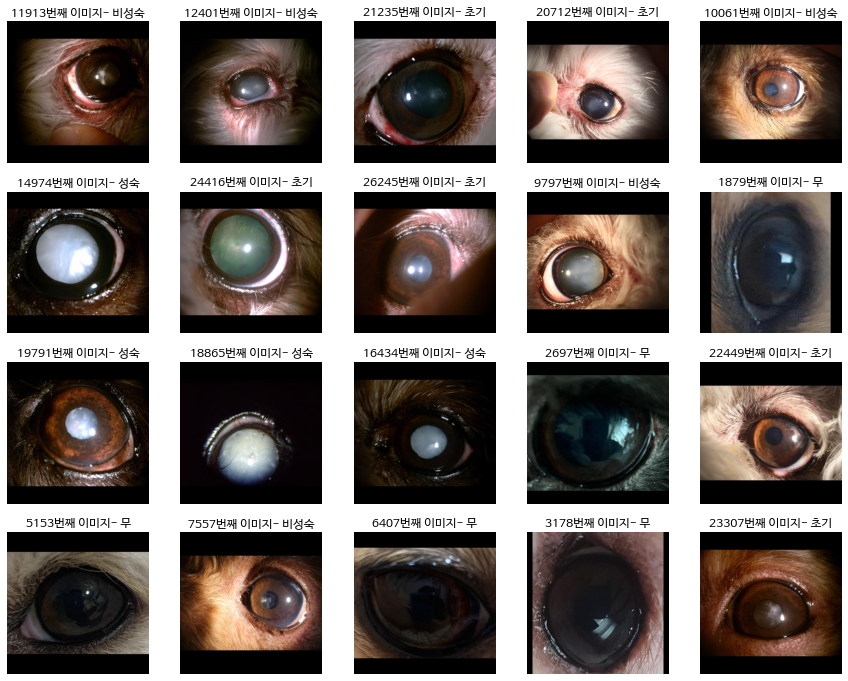

In [ ]:
# 이미지 출력해보기

random_int = np.random.randint(0,len(df), size=20)

fig = plt.figure(figsize = (15, 12))

for idx, i in enumerate(random_int):
  ax = fig.add_subplot(4,5,idx+1)
  ax.imshow(df.iloc[i]['이미지데이터'])
  ax.set_title(f'{i}번째 이미지- {df.iloc[i]["백내장상태"]}')
  ax.set_axis_off()
  print('shape : ', df.iloc[i]['이미지데이터'].shape)

fig.show()
del fig, ax, i

Text(0.5, 1.0, '무')

Text(0.5, 1.0, '비성숙')

Text(0.5, 1.0, '성숙')

Text(0.5, 1.0, '초기')

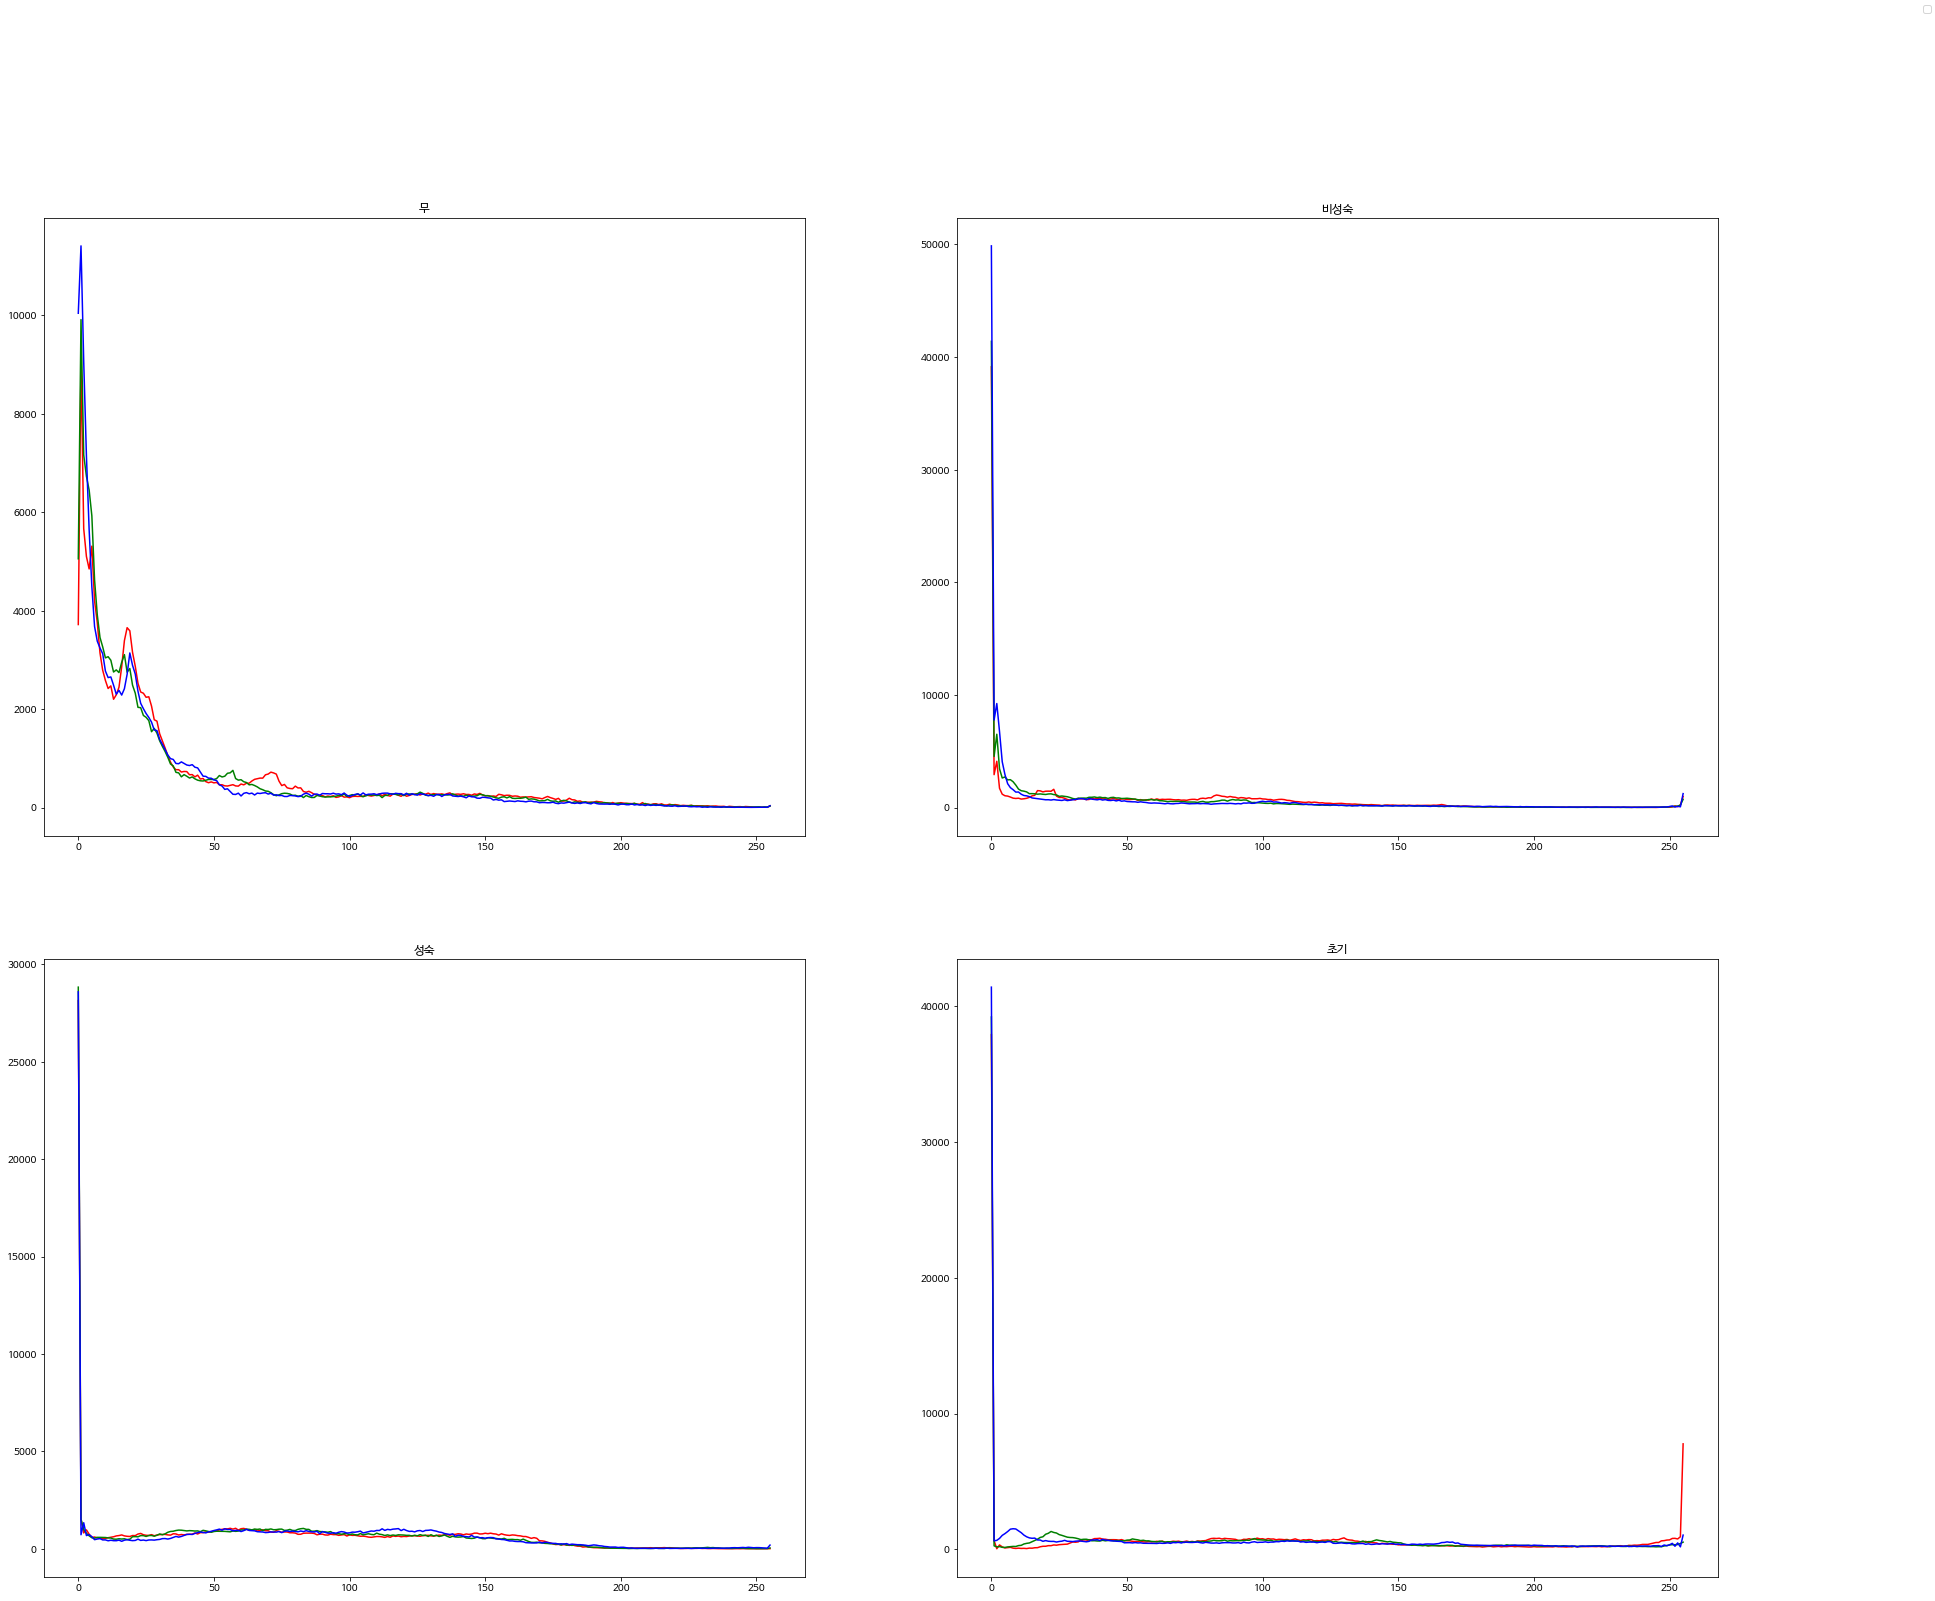

In [ ]:
# 각 라벨별 색상 히스토그램 확인하기 (돌리지말고 보기만하기)

colors = ('r', 'g', 'b')
hist = [[[], [], []], [[], [], []], [[], [], []], [[], [], []]]

fig = plt.figure(figsize=(30, 25))

for i, label in enumerate(labels):
  temp = [ df.iloc[j, 1] for j in range(len(df)) if df.iloc[j, 2]==label ]
  hist[i][0] = cv2.calcHist(temp, [0], None, [256], [0, 256])
  hist[i][1] = cv2.calcHist(temp, [1], None, [256], [0, 256])
  hist[i][2] = cv2.calcHist(temp, [2], None, [256], [0, 256])
  ax = fig.add_subplot(2,2,i+1)
  ax.set_title(label)
  ax.plot(hist[i][0], color=colors[0])
  ax.plot(hist[i][1], color=colors[1])
  ax.plot(hist[i][2], color=colors[2])

fig.legend()
fig.show()

del colors, hist, ax, fig, i, label

# 무 클래스의 사진들은 눈동자가 검은색이므로 50 이하의 수에 RGB가 많이 분포해 있다. (수가 작을수록 어두운색)
# 초기/비성숙/성숙 클래스의 사진들은 무 클래스와 비교하면 백내장이 진행중인 눈동자이므로 어두운 색 분포가 적은 것을 비교할 수 있다.

# 전처리
- 1. 해상도(크기) / 색상채널 통일
- 2. 선명도 / 대비
- 3. 이진화
- 4. 타겟변수 원핫인코딩
- 5. 데이터 분리

In [ ]:
# 이미지를 출력하는 함수 모음

def imgshow(idx, s): # 원본 이미지 출력
  fig = plt.figure(figsize = (15, 5))
  for index, i in enumerate(idx):
    ax = fig.add_subplot(1, len(idx), index+1)
    ax.imshow(df.iloc[i]['이미지데이터']),  ax.set_axis_off()

  fig.suptitle(s, size=20)
  fig.tight_layout()
  fig.show()

def imgshow2(idx, s): # 흑백 이미지 출력
  fig = plt.figure(figsize = (15, 5))
  for index, i in enumerate(idx):
    ax = fig.add_subplot(1, len(idx), index+1)
    ax.imshow(df.iloc[i]['흑백'].reshape(gray_shape[:-1]), cmap='gray'), ax.set_axis_off()

  fig.suptitle(s, size=20)
  fig.tight_layout()
  fig.show()

def imgshow3(idx, s): # 이진화 이미지 출력 
  fig = plt.figure(figsize = (15, 5))
  for index, i in enumerate(idx):
    ax = fig.add_subplot(1, len(idx), index+1)
    ax.imshow(df.iloc[i]['이진화'].reshape(gray_shape[:-1]), cmap='gray'), ax.set_axis_off()

  fig.suptitle(s, size=20)
  fig.tight_layout()
  fig.show()

## 1. 해상도(크기) / 색상채널 통일
- 해상도(크기) 통일 : 이미 (400, 400, 3)으로 통일되어 있음 -> 사이즈가 크므로 작은 사이즈로 변경해야함
- 색상 통일 : 털색은 학습에 의미 없는 데이터이므로 눈색만 들어가도록 흑백 이미지로 변환하여 비교한다

(224, 224, 3)

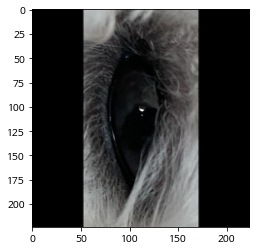

In [ ]:
# 해상도 변경 (주로 32X32 ,64X64 ,96X96 ,224, 224 로 많이 씀) 

size = 224

# LeNet5 모델의 인풋사이즈(32,32)
# VGG-16 모델의 인풋사이즈(224, 224)

for i in range(len(df)):
  df.iloc[i]['이미지데이터'] = cv2.resize(df.iloc[i]['이미지데이터'], (size,size)) 

# 사이즈 변경이 잘 되었는지 확인
df.iloc[1]['이미지데이터'].shape
plt.imshow(df.iloc[0]['이미지데이터'])

(224, 224, 1)

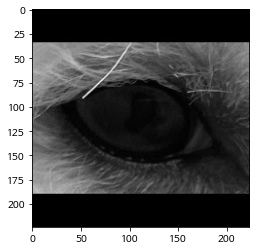

In [ ]:
# 색상채널 흑백으로 변경

# 흑백이미지로 변환한 경우, 2차원이 되었으므로 딥러닝 학습시키기 위해서 3차원이되도록 reshape 해줘야함
# 주의할점 OpenCV는 BGR타입 이미지를 읽고, Matplotlib등 대부분의 이미지 라이브러리는 RGB타입으로 읽음.
#           -> BGR 을 RGB타입으로 변경해주는 것이 좋다.

gray_shape = (size, size, 1)


df['흑백'] = [ cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in df['이미지데이터']]
df['흑백'] = [img.reshape(gray_shape) for img in df['흑백'] ]

# 흑백으로 변경되었는지 확인
df.iloc[1]['흑백'].shape
plt.imshow(df.iloc[0]['흑백'].reshape(gray_shape[:-1]), cmap='gray')

## 2. 선명도, 대비 조정

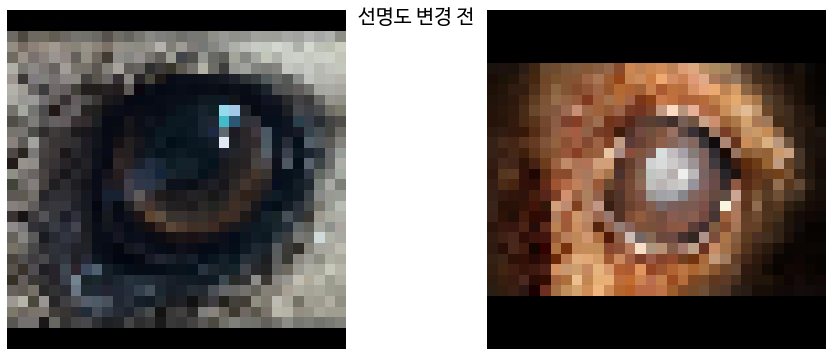

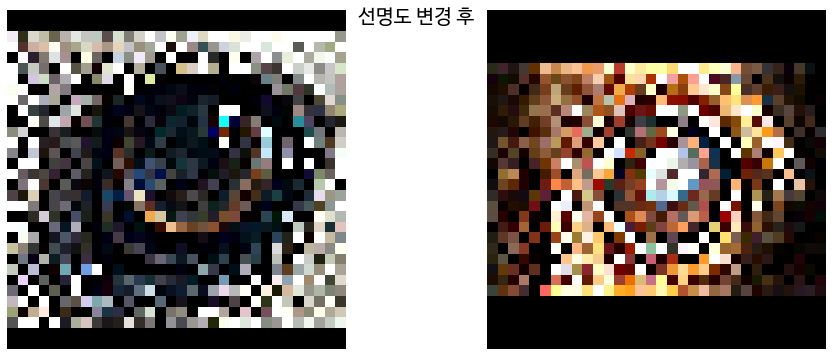

In [ ]:
# 선명도 변경


# 선명도 변경 전 이미지 출력
imgshow([0, 14974], '선명도 변경 전') # 14974


# 선명도 변경
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]]) # 선명도 높이는 커널 생성
df['이미지데이터'] = [ cv2.filter2D(img, -1, kernel) for img in df['이미지데이터'] ]
df['흑백'] = [ cv2.filter2D(img, -1, kernel) for img in df['흑백'] ]



# 선명도 변경 후 이미지 출력
imgshow([0, 14974], '선명도 변경 후')

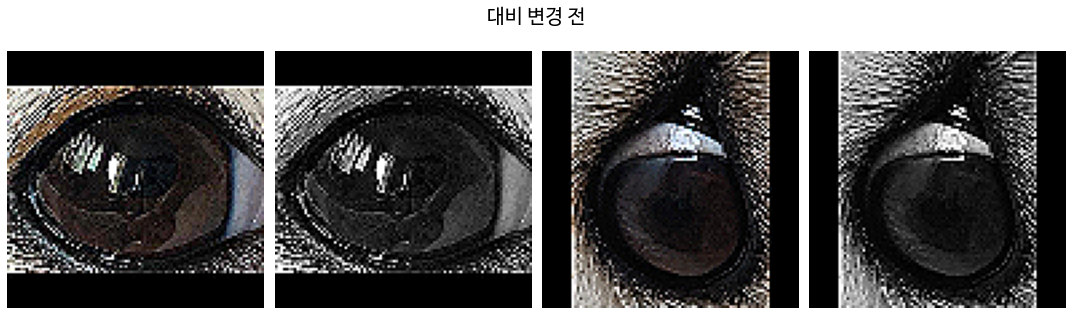

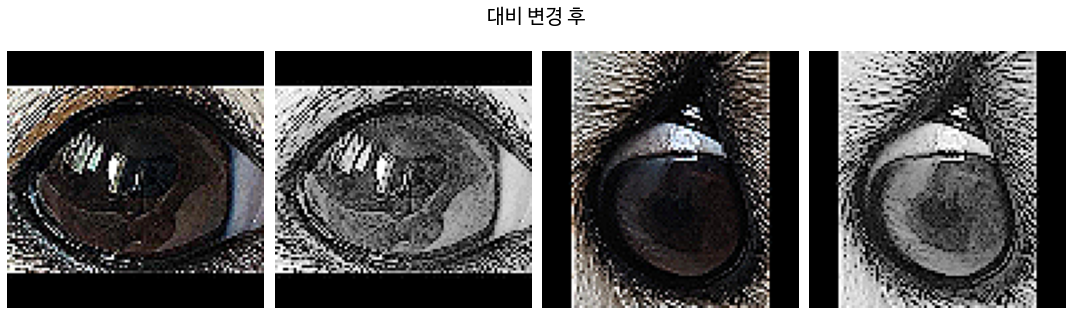

In [ ]:
# 흑백 대비 변경

# 대비 변경 전 이미지 출력
imgshow([0, 14974], '대비 변경 전')


# 대비 변경

# df['이미지데이터'] = [ cv2.equalizeHist(img) for img in df['이미지데이터'] ]
df['흑백'] = [ cv2.equalizeHist(img) for img in df['흑백'] ]


# 대비 변경 후 이미지 출력
imgshow([0, 14974], '대비 변경 후')

## 3. 이진화 (임계값 처리)
- thresholding (이진화) : 어떤 값보다 큰 값을 가진 픽셀을 흰색으로 만들고 작은 값을 가진 픽셀은 검은색으로 만드는 과정


- adaptive thresholding (적응적 이진화) : 픽셀의 임계값이 주변 픽셀의 강도에 의해 결정
- max_output_value : 출력 픽셀 강도의 최대값을 결정하는 매개변수

- 이진화는 이미지 안의 영역 마다 빛 조건이 달라질 때 도움이 됩니다.

- cv2.ADAPTIVE_THRESH_GAUSSIAN_C는 픽셀의 임계값을 주변 픽셀 강도의 가중치 합으로 설정합니다
- cv2.ADAPTIVE_THRESH_MEAN_C는 픽셀의 임계값을 주변 픽셀의 평균으로 설정합니다

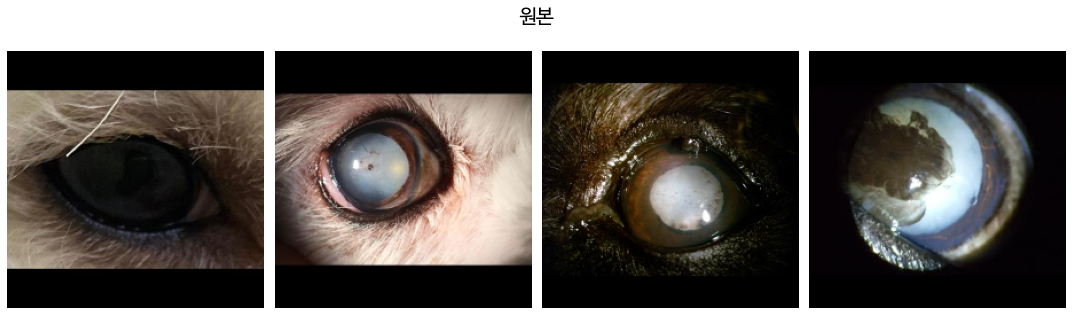

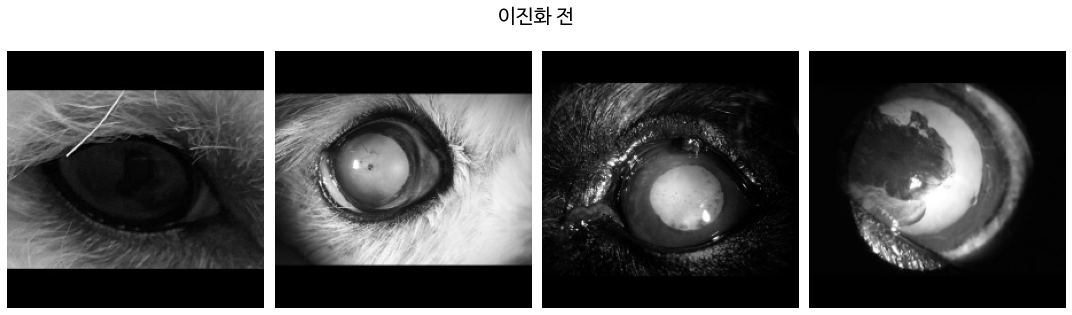

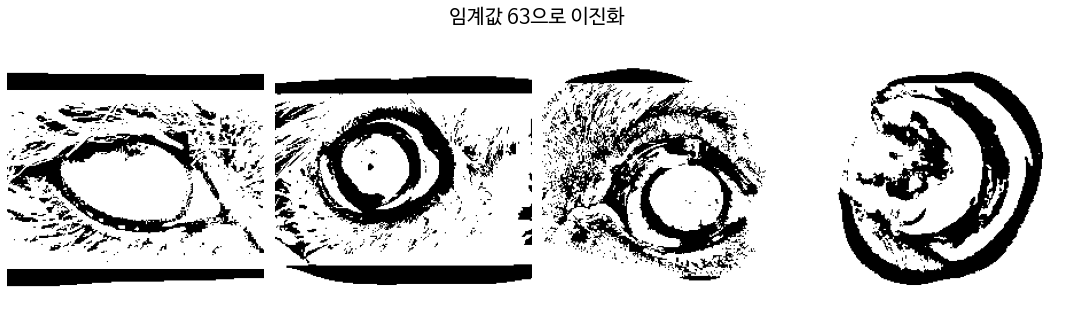

In [ ]:
# 이진화 (임계값 처리) 1

max_output_value = 255
neighborhood_size = 63 #63, 127 191
subtract_from_mean = 10
df['이진화'] = [ cv2.adaptiveThreshold(img, max_output_value,
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
                                         neighborhood_size, subtract_from_mean) for img in df['흑백']] # 적응적 임계처리를 적용
imgshow([0, 14974, 14005, 16000], '원본')

# 이진화 전 이미지 출력
imgshow2([0, 14974, 14005, 16000], '이진화 전')

# 이진화 후 이미지 출력
imgshow3([0, 14974, 14005, 16000], '임계값 63으로 이진화')

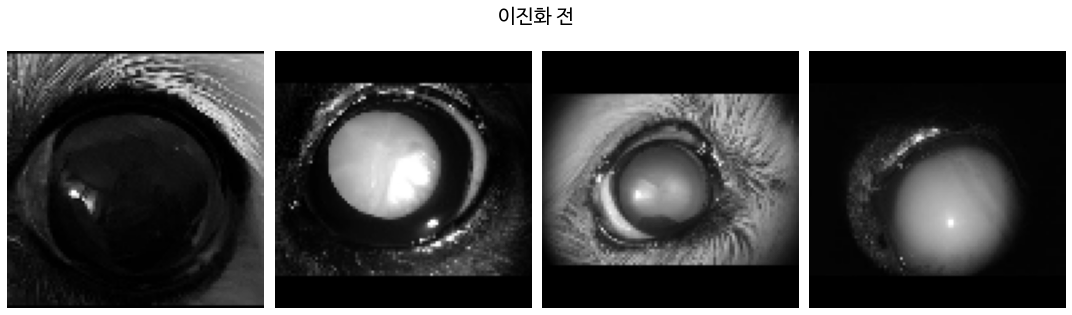

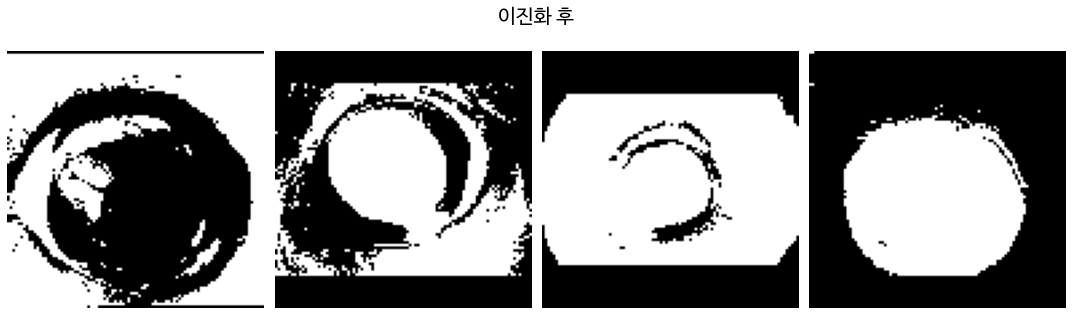

In [ ]:
# 이진화(임계값처리) 2 안씀

# cv2.ADAPTIVE_THRESH_MEAN_C를 적용합니다.

df['이진화'] = [ cv2.adaptiveThreshold(img, max_output_value,
                                         cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,
                                         neighborhood_size, subtract_from_mean) for img in df['흑백']] # 적응적 임계처리를 적용

# 이진화 전 이미지 출력
imgshow2([0, 14974, 14005, 16000], '이진화 전')

# 이진화 후 이미지 출력
imgshow3([0, 14974, 14005, 16000], '이진화 후')

## 4. 타겟변수 원핫인코딩
- [ '무' , '비성숙' , '성숙' , '초기' ]
- 타겟변수(클래스) 4개이므로 원핫인코딩 해준다.


In [ ]:
# 원핫인코딩
# with tf.device("/device:GPU:0"):
temp = pd.get_dummies(df.iloc[:]['백내장상태'])
df = pd.concat([df, temp],axis=1)
del temp
df

파일이름  \
0      crop_D36_2790d234-60a5-11ec-8402-0a7404972c70.jpg   
1      crop_D49_2af8048b-60a5-11ec-8402-0a7404972c70.jpg   
2      crop_D17_24d90bdb-60a5-11ec-8402-0a7404972c70.jpg   
3      crop_D51_270d864e-60a5-11ec-8402-0a7404972c70.jpg   
4       crop_D0_27b4fd44-60a5-11ec-8402-0a7404972c70.jpg   
...                                                  ...   
27515  crop_D13_2fb457b1-60a5-11ec-8402-0a7404972c70.jpg   
27516  crop_D32_2f229e0e-60a5-11ec-8402-0a7404972c70.jpg   
27517  crop_D15_2ed43968-60a5-11ec-8402-0a7404972c70.jpg   
27518  crop_D48_0ecdb5f3-60a5-11ec-8402-0a7404972c70.jpg   
27519  crop_D50_352e8242-60a5-11ec-8402-0a7404972c70.jpg   

                                                  이미지데이터 백내장상태  무  비성숙  성숙  초기  
0      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     무  1    0   0   0  
1      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     무  1    0   0   0  
2      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     무  1    0   0   0  
3      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     무  1    0   0   0  
4      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     무  1    0   0   0  
...                                                  ...   ... ..  ...  ..  ..  
27515  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...    초기  0    0   0   1  
27516  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...    초기  0    0   0   1  
27517  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...    초기  0    0   0   1  
27518  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...    초기  0    0   0   1  
27519  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...    초기  0    0   0   1  

[27520 rows x 7 columns]

## 5. 학습에 사용할 데이터 분리

- 같은 정수형(int)이어도 표현할 수 있는 수의 범위에 따라 int16, int32, int64 로 나뉜다.
  - 데이터 수가 300 을 넘지 않는 정수이므로 int16 타입으로 변환해준다. 
  - (데이터 타입 변환안하면 텐서로 변환 할 수 없어서 모델 학습시 에러남)  

- Int16 : -32,768 ~ +32,767
- Int32 : -2,147,483,648 ~ +2,147,483,647
- Int64 : -9,223,372,036,854,775,808 ~ +9,223,372,036,854,775,807

In [ ]:
# 원본 컬러인 경우 : 이코드만 실행

x = np.array([df.iloc[i]['이미지데이터'] for i in range(len(df))], dtype=np.int16)
y = np.array([df.iloc[i][labels] for i in range(len(df))], dtype=np.int16)

del df

print(x.shape, y.shape)

(27520, 224, 224, 3) (27520, 4)


In [ ]:
# 흑백일 경우 : 이코드만 실행

x = np.array([df.iloc[i]['흑백'] for i in range(len(df))], dtype=np.int16)
y = np.array([df.iloc[i][labels] for i in range(len(df))], dtype=np.int16)

print(x.shape, y.shape)

(27520, 224, 224, 1) (27520, 4)


In [ ]:
# 이진화일 경우 : 이코드만 실행

df['이진화'] = [img.reshape(gray_shape) for img in df['이진화'] ]
x = np.array([df.iloc[i]['이진화'] for i in range(len(df))], dtype=np.int16)
y = np.array([df.iloc[i][labels] for i in range(len(df))], dtype=np.int16)

print(x.shape, y.shape)

(27520, 224, 224, 1) (27520, 4)


In [ ]:
# train, test 데이터 분리

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size = 0.2, random_state=123) # test_size 0.2로 했을때 램터짐
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
del x, y

(22016, 224, 224, 3) (22016, 4)
(5504, 224, 224, 3) (5504, 4)


# 모델링
- 사전학습된 모델을 가져와서 직접 만든 분류기 층을 추가하여 전이학습한다.

In [ ]:
# 코랩 서버 시간이 미국 기준이므로 한국 시간을 리턴해주는 함수
def now():
  now = datetime.now()+timedelta(hours=9) # 학습 종료 시간
  return now

In [ ]:
# 설정 (inputshape, learning_rate, early_stopping 등 변수 설정)

config = {
    'inputshape' : x_train[0].shape
}

### Base Model

In [ ]:
# 모형(단순모형, 복잡한 함수형 모형) 사이즈 : 224 
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import Adam

model  = tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=config['inputshape']))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)) )

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer=Adam(1e-3), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 220, 220, 32)      832       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 50, 50, 64)        102464    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 25, 25, 64)      

In [ ]:
# 모형(단순모형, 복잡한 함수형 모형) 사이즈 : 32, 64, 96
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import Adam

model  = tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(5,5), padding='same', activation='relu', input_shape=config['inputshape']))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64,kernel_size=(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64,kernel_size=(5,5), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(128,kernel_size=(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(128,kernel_size=(5,5), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same') )

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer=Adam(1e-3), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.summary()

### VGG 16

#### VGG16 모델 구조
- 전이학습 : 사전학습된 VGG-16 모델을 로드하여, 우리 데이터에 맞는 분류 층을 추가하여 사용한다.
- 전이학습 할 수 있도록 ImageNet 데이터로 사전학습된 다양한 모델들을 Keras 라이브러리에서 제공한다.

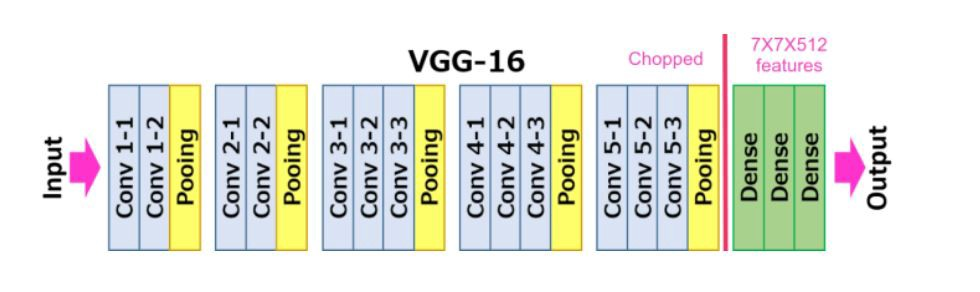

In [ ]:
# VGG-16 사전학습 모델 로드하기
from tensorflow.keras.applications import VGG16

def vgg():
  vgg16 = VGG16(weights = None, input_shape = config['inputshape'], include_top = False) # 'imagenet'
  # print(vgg.summary())
  return vgg16



# 사전학습 모델에 직접 만든 분류기 층 추가하기 (ver3)

def ver3():
  vgg16 = VGG16(weights = None, input_shape = config['inputshape'], include_top = False)
  H = tf.keras.layers.Dropout(0.2)(vgg16.output)
  H = tf.keras.layers.Flatten()(H)

  H = tf.keras.layers.Dense(256)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H)
  Y = tf.keras.layers.Dense(4, activation = 'softmax')(H)
  model = tf.keras.models.Model(vgg16.input, Y)

  model.compile(loss = 'categorical_crossentropy', metrics = 'accuracy', optimizer='Adam')
  del vgg16, H, Y

  model.summary()
  return model

def ver4():
  vgg16 = VGG16(weights = 'imagenet', input_shape = config['inputshape'], include_top = False, pooling='avg')

  H = tf.keras.layers.Dense(1024, activation = 'relu')(vgg16.output)
  Y = tf.keras.layers.Dense(4, activation = 'softmax')(H)

  model = tf.keras.models.Model(vgg16.input, Y)
  model.compile(loss = 'categorical_crossentropy', metrics = 'accuracy', optimizer='Rmsprop') # Adam Rmsprop
  del vgg16, H, Y

  model.summary()
  return model

def ver5(): # ver4나 ver5나 똑같음
  vgg16 = VGG16(weights = 'imagenet', input_shape = config['inputshape'], include_top = False, pooling='avg') # None, imagenet
  model = tf.keras.models.Sequential()
  model.add(vgg16)
  model.add(tf.keras.layers.Dense(1024, activation='relu'))
  model.add(tf.keras.layers.Dense(4, activation='softmax'))
  del vgg16

  model.compile(loss = 'categorical_crossentropy', metrics = 'accuracy', optimizer='Rmsprop') # Adam Rmsprop
  model.summary()
  return model

def ver6(): # ver4에 flatten 추가한것
  vgg16 = VGG16(weights = None, input_shape = config['inputshape'], include_top = False)

  H = tf.keras.layers.Flatten()(vgg16.output)
  H = tf.keras.layers.Dense(1024, activation = 'relu')(H)
  Y = tf.keras.layers.Dense(4, activation = 'softmax')(H)

  model = tf.keras.models.Model(vgg16.input, Y)
  model.compile(loss = 'categorical_crossentropy', metrics = 'accuracy', optimizer='Rmsprop') # Adam Rmsprop
  del vgg16, H, Y

  model.summary()
  return model

### 모델 학습

In [ ]:
# 모델 불러오기

model = ver4() # vgg16
# model = ver6()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# 콜백 지정 - EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopper = EarlyStopping(monitor='val_loss', 
                              patience=10, 
                              min_delta=0.0,
                              mode='min',
                              verbose=1,
                              restore_best_weights=True)

# 모델 저장 안됨(일반 모델 객체가 아니라 hub 레이어라서 안됨)
model_save_path = os.path.join('/content/drive/MyDrive/융합프로젝트_1조/모델', 'VGG16_{epoch:02d}-{loss:.2f}-{val_loss:.2f}.h5')
model_checkpoint = ModelCheckpoint(filepath = model_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [ ]:
# 모델 학습
# with tf.device("/device:GPU:0"):
start = now() # 학습시작 시간
print('학습 시작 시간 : ', start.strftime('%Y-%m-%d %H:%M:%S'))


history = model.fit(x_train, y_train,  
          validation_split = 0.2,
          epochs=50, 
          batch_size=32,
          # callbacks=[early_stopper]#, model_checkpoint]
          )

end = now() # 학습 종료 시간
fit_time = end-start
print('학습 종료 시간 : ', end.strftime('%Y-%m-%d %H:%M:%S'))
print('학습 소요 시간 : ', fit_time)
# 코랩 gpu 기본으로 하면 3분씩 걸림
# 코랩 gpu 프리미엄 으로 37초씩 걸림

학습 시작 시간 :  2023-01-06 10:56:45
Epoch 1/50
551/551 [==============================] - 267s 461ms/step - loss: 36089.7031 - accuracy: 0.4511 - val_loss: 0.9977 - val_accuracy: 0.4973
Epoch 2/50
551/551 [==============================] - 245s 445ms/step - loss: 0.9688 - accuracy: 0.5288 - val_loss: 0.8506 - val_accuracy: 0.5461
Epoch 3/50
551/551 [==============================] - 245s 444ms/step - loss: 0.9271 - accuracy: 0.5505 - val_loss: 0.9174 - val_accuracy: 0.5463
Epoch 4/50
551/551 [==============================] - 243s 442ms/step - loss: 0.8661 - accuracy: 0.5735 - val_loss: 0.8611 - val_accuracy: 0.5777
Epoch 5/50
551/551 [==============================] - 243s 441ms/step - loss: 0.8813 - accuracy: 0.5897 - val_loss: 0.8263 - val_accuracy: 0.5799
Epoch 6/50
551/551 [==============================] - 243s 441ms/step - loss: 0.8044 - accuracy: 0.6150 - val_loss: 1.1401 - val_accuracy: 0.5559
Epoch 7/50
551/551 [==============================] - 243s 441ms/step - loss: 0.7797 - a

In [ ]:
# 모델 저장

model_dir = "/content/drive/MyDrive/융합프로젝트_1조/모델/"
model_name = "vgg16_epochs50"

tf.keras.models.save_model(model, model_dir + model_name+"_"+end.strftime('%y%m%d_%H%M%S')+".h5", include_optimizer=True, save_format='tf')


# 저장한 모델 불러오기

In [ ]:
# 모델 불러오기

filename = "/content/drive/MyDrive/융합프로젝트_1조/모델/vgg16_221230_163336.h5"
new_model = tf.keras.models.load_model(filepath=filename, compile=True)

new_model.summary()

# 성능평가

In [ ]:
# f1 점수, 정확도 Loss 확인

loss, accuracy = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)


print(f'F1점수 : {f1_score(y_test_class, y_pred_class, average="macro"):.6f}')
print(f'정확도 : {accuracy:.6f}')
print(f'Loss : {loss:.6f}')

print('리포트 : \n', classification_report(y_true=y_test_class, y_pred=y_pred_class, zero_division=0))

172/172 [==============================] - 24s 140ms/step
F1점수 : 0.588039
정확도 : 0.608467
Loss : 2.017814
리포트 : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1413
           1       0.40      0.66      0.50      1333
           2       0.74      0.22      0.33      1335
           3       0.55      0.56      0.55      1423

    accuracy                           0.61      5504
   macro avg       0.66      0.60      0.59      5504
weighted avg       0.66      0.61      0.59      5504



# 손실함수 그래프 (유사도 등)

In [ ]:
# loss, accuracy 그래프 각각 따로
# 손실함수와 정답률의 변화를 시각화 

fig_dir = "/content/drive/MyDrive/융합프로젝트_1조/그래프/"

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (15, 6))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()
plt.savefig(fig_dir+model_name+'_'+end.strftime('%y%m%d_%H%M%S')+'.png', dpi=100)
plt.show()



# 예측값과 실제값 비교

In [ ]:
# 예측 결과값 확인하기

pd.DataFrame(([labels[a] for a in y_pred_class[:50]], [labels[a] for a in y_test_class[:50]]), index=['예측한 타겟값', '실제 타겟값']).T

예측한 타겟값 실제 타겟값
0      비성숙    비성숙
1      비성숙    비성숙
2       초기     초기
3      비성숙     성숙
4       성숙     성숙
5       초기     초기
6       성숙      무
7      비성숙     성숙
8       성숙    비성숙
9      비성숙    비성숙
10      초기     성숙
11     비성숙    비성숙
12      초기     초기
13       무      무
14     비성숙    비성숙
15       무      무
16      성숙    비성숙
17      초기     성숙
18      초기     초기
19      성숙     초기
20      초기    비성숙
21       무      무
22       무      무
23       무      무
24     비성숙    비성숙
25     비성숙     성숙
26      성숙     성숙
27      성숙     성숙
28     비성숙    비성숙
29       무      무
30     비성숙     초기
31      초기     초기
32       무      무
33     비성숙    비성숙
34       무      무
35      초기     초기
36       무      무
37      초기     초기
38       무      무
39     비성숙    비성숙
40      초기    비성숙
41     비성숙     성숙
42      성숙      무
43       무      무
44     비성숙     성숙
45      성숙     초기
46     비성숙     성숙
47      성숙     성숙
48      초기     초기
49       무      무

Text(0.5, 1.0, '5166번째\t타겟: 비성숙\t예측: 비성숙')

Text(0.5, 1.0, '5029번째\t타겟: 비성숙\t예측: 성숙')

Text(0.5, 1.0, '5383번째\t타겟: 초기\t예측: 비성숙')

Text(0.5, 1.0, '4960번째\t타겟: 성숙\t예측: 비성숙')

Text(0.5, 1.0, '3395번째\t타겟: 초기\t예측: 초기')

Text(0.5, 1.0, '261번째\t타겟: 무\t예측: 무')

Text(0.5, 1.0, '4381번째\t타겟: 초기\t예측: 초기')

Text(0.5, 1.0, '5212번째\t타겟: 비성숙\t예측: 성숙')

Text(0.5, 1.0, '765번째\t타겟: 성숙\t예측: 성숙')

Text(0.5, 1.0, '125번째\t타겟: 비성숙\t예측: 비성숙')

Text(0.5, 1.0, '447번째\t타겟: 초기\t예측: 초기')

Text(0.5, 1.0, '477번째\t타겟: 비성숙\t예측: 비성숙')

Text(0.5, 1.0, '4344번째\t타겟: 무\t예측: 무')

Text(0.5, 1.0, '3175번째\t타겟: 비성숙\t예측: 비성숙')

Text(0.5, 1.0, '3380번째\t타겟: 초기\t예측: 초기')

Text(0.5, 1.0, '5118번째\t타겟: 성숙\t예측: 성숙')

Text(0.5, 1.0, '4152번째\t타겟: 성숙\t예측: 성숙')

Text(0.5, 1.0, '3163번째\t타겟: 성숙\t예측: 비성숙')

Text(0.5, 1.0, '2275번째\t타겟: 성숙\t예측: 비성숙')

Text(0.5, 1.0, '4523번째\t타겟: 성숙\t예측: 비성숙')

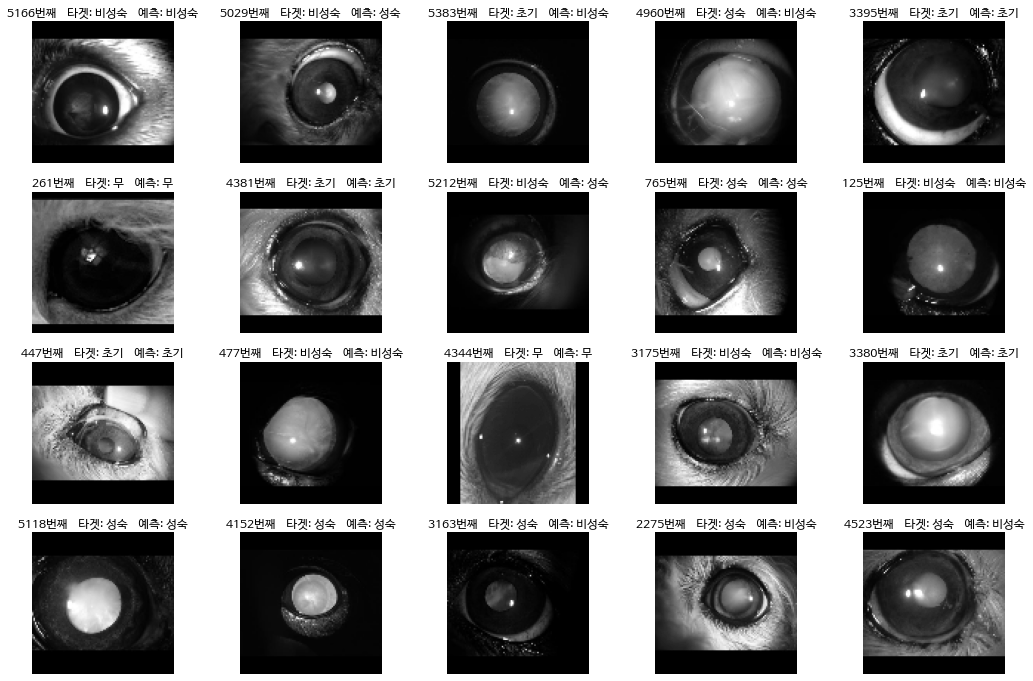

In [ ]:
# 랜덤 테스트 데이터 넣어서 예측값과 실제 타겟값 비교하기

random_int = np.random.randint(len(x_test), size=20)

fig = plt.figure(figsize = (18, 12))

for idx, i in enumerate(random_int):
  ax = fig.add_subplot(4,5,idx+1)
  ax.imshow(x_test[i].reshape(96, 96), cmap='gray')
  ax.set_title(f'{i}번째\t타겟: {labels[y_test_class[i]]}\t예측: {labels[y_pred_class[i]]}')
  ax.set_axis_off()

fig.show()

In [ ]:
# 예측 오답 개수 확인

wrong_result = []

for n in range(len(y_test_class)):
    if y_pred_class[n] != y_test_class[n]:
        wrong_result.append(n)

len(wrong_result)
# LeNet5 epochs 50 2117 
# LeNet5 epochs 100 2079
# VGG16 epochs 10, 30  4171
# LeNet5 epochs 30 2368
# 흑백 VGG16 epochs 18 1880
# 흑백32 VGG16 epochs 21 1636
# 흑백64 VGG16 epochs 21 1457

1837

[3173,
 1930,
 2468,
 2113,
 5,
 4125,
 769,
 2298,
 4102,
 3195,
 1564,
 1855,
 4462,
 1934,
 3465,
 3380]

<Figure size 1296x864 with 0 Axes>

Text(0.5, 1.0, '0번째\t타겟: 초기\t예측: 비성숙')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, '1번째\t타겟: 성숙\t예측: 비성숙')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, '2번째\t타겟: 초기\t예측: 비성숙')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, '3번째\t타겟: 초기\t예측: 비성숙')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, '4번째\t타겟: 초기\t예측: 비성숙')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, '5번째\t타겟: 초기\t예측: 성숙')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, '6번째\t타겟: 초기\t예측: 비성숙')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, '7번째\t타겟: 초기\t예측: 성숙')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, '8번째\t타겟: 비성숙\t예측: 초기')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, '9번째\t타겟: 비성숙\t예측: 성숙')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, '10번째\t타겟: 비성숙\t예측: 성숙')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, '11번째\t타겟: 비성숙\t예측: 초기')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, '12번째\t타겟: 성숙\t예측: 비성숙')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, '13번째\t타겟: 비성숙\t예측: 초기')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, '14번째\t타겟: 초기\t예측: 비성숙')

(-0.5, 63.5, 63.5, -0.5)

Text(0.5, 1.0, '15번째\t타겟: 초기\t예측: 비성숙')

(-0.5, 63.5, 63.5, -0.5)

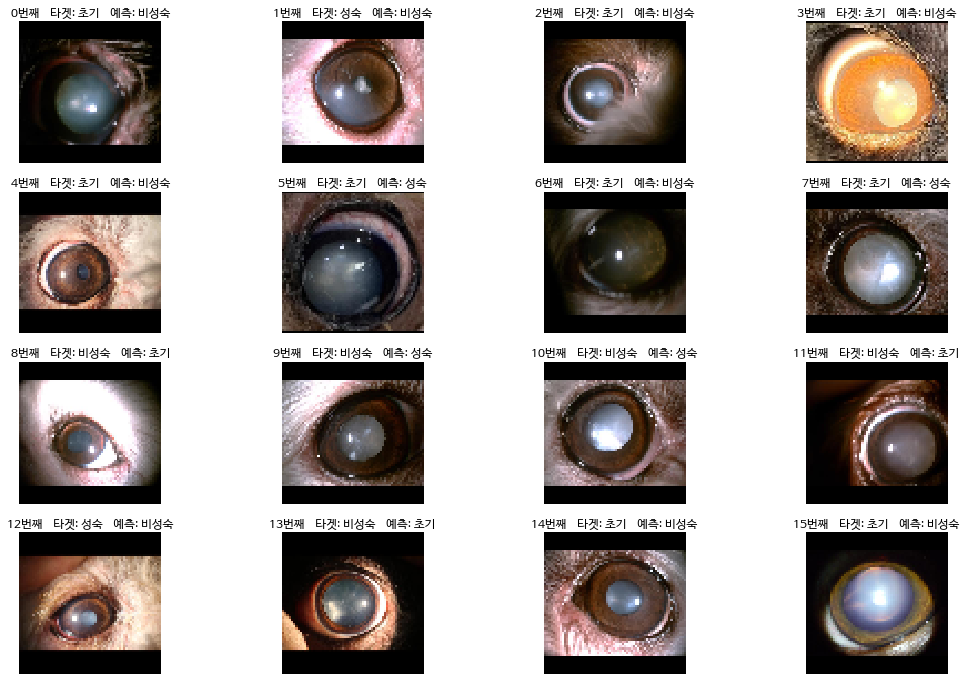

In [ ]:
# 오답 데이터만 확인하기


import random

samples = random.choices(population= wrong_result, k = 16)
samples

plt.figure(figsize=(18, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(x_test[n].reshape(64, 64, 3), interpolation='nearest')#, cmap='gray')
    plt.title(f'{idx}번째\t타겟: {labels[y_test_class[n]]}\t예측: {labels[y_pred_class[n]]}')
    plt.axis('off')
    
plt.show()

# 신경망 시각화

In [ ]:
# 신경망 확인하기
import tensorflow as tf

get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]
print('층 이름: ', get_layer_name)
print('출력 층 이름: ', get_output)

# weights 출력해보기
get_weights = [layer.get_weights for layer in model.layers]
print('가중치 : ', get_weights)

층 이름:  ['input_6', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool', 'dropout_5', 'flatten_5', 'dense_10', 'batch_normalization_5', 'activation_5', 'dense_11']
출력 층 이름:  [<KerasTensor: shape=(None, 64, 64, 3) dtype=float32 (created by layer 'input_6')>, <KerasTensor: shape=(None, 64, 64, 64) dtype=float32 (created by layer 'block1_conv1')>, <KerasTensor: shape=(None, 64, 64, 64) dtype=float32 (created by layer 'block1_conv2')>, <KerasTensor: shape=(None, 32, 32, 64) dtype=float32 (created by layer 'block1_pool')>, <KerasTensor: shape=(None, 32, 32, 128) dtype=float32 (created by layer 'block2_conv1')>, <KerasTensor: shape=(None, 32, 32, 128) dtype=float32 (created by layer 'block2_conv2')>, <KerasTensor: shape=(None, 16, 16, 128) dtype=float32 (created by l

In [ ]:
# 신경망 시각화

visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output)

test_img = x_test[0]
feature_maps = visual_model.predict(test_img)

for layer_name, feature_map in zip(get_layer_name, feature_maps):
    # Dense 층은 제외합니다.
    if(len(feature_map.shape) == 4):
        img_size = feature_map.shape[1]
        features = feature_map.shape[-1]
        
        # (img_size, img_size)의 feature_map이 features 개수만큼 존재합니다.
        display_grid = np.zeros((img_size, img_size * features))
        
       #각 특징맵을 display_grid 배열에 이어 붙입니다. 
        for i in range(features):
            x = feature_map[0, :, :, i]
            x -= x.mean(); x /= x.std()
            x *= 64; x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * img_size : (i + 1) * img_size] = x
            
        plt.figure(figsize = (features, 2 + 1./features))
        plt.title(layer_name, fontsize = 20)
        plt.grid(False)
        plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')